In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# 8 bins
ALICE_cent_bins = np.array([[0,5],[5,10],[10,20],[20,30],[30,40],[40,50],[50,60],[60,70]]) 

obs_cent_list = {
'Pb-Pb-5020': {
    'dNch_deta' : ALICE_cent_bins,
    'dET_deta' : np.array([[0, 2.5], [2.5, 5], [5, 7.5], [7.5, 10],
                           [10, 12.5], [12.5, 15], [15, 17.5], [17.5, 20],
                           [20, 22.5], [22.5, 25], [25, 27.5], [27.5, 30],
                           [30, 32.5], [32.5, 35], [35, 37.5], [37.5, 40],
                           [40, 45], [45, 50], [50, 55], [55, 60],
                           [60, 65], [65, 70]]), # 22 bins
    'dN_dy_pion'   : ALICE_cent_bins,
    'dN_dy_kaon'   : ALICE_cent_bins,
    'dN_dy_proton' : ALICE_cent_bins,
    'dN_dy_Lambda' : np.array([[0,5],[5,10],[10,20],[20,40],[40,60]]), # 5 bins
    'dN_dy_Omega'  : np.array([[0,10],[10,20],[20,40],[40,60]]), # 4 bins
    'dN_dy_Xi'     : np.array([[0,10],[10,20],[20,40],[40,60]]), # 4 bins
    'mean_pT_pion'   : ALICE_cent_bins,
    'mean_pT_kaon'   : ALICE_cent_bins,
    'mean_pT_proton' : ALICE_cent_bins,
    'pT_fluct' : np.array([[0,5],[5,10],[10,15],[15,20], [20,25],[25,30],[30,35],[35,40], [40,45],[45,50],[50,55],[55,60]]), #12 bins
    'v22' : ALICE_cent_bins,
    'v32' : np.array([[0,5],[5,10],[10,20],[20,30], [30,40],[40,50]]), # 6 bins
    'v42' : np.array([[0,5],[5,10],[10,20],[20,30], [30,40],[40,50]]), # 6 bins
    }
}

In [17]:
float_t = '<f8'
number_of_models_per_run = 4

sdtype = [('Pb-Pb-5020',
              [(obs, [("mean", float_t, len(cent_list)),
                      ("err", float_t, len(cent_list))]) \
                for obs, cent_list in obs_cent_list['Pb-Pb-5020'].items()],
           number_of_models_per_run)]

dsMAP1 = np.fromfile("obs_Pb-Pb-5020.dat", dtype = sdtype)
dsMAP2 = np.fromfile("obs_Pb-Pb-5020.dat", dtype = sdtype)

MAP_data1 = {}
MAP_data2 = {}
MAP_data1["Pb-Pb-5020"] = dsMAP1["Pb-Pb-5020"]
MAP_data2["Pb-Pb-5020"] = dsMAP2["Pb-Pb-5020"]
print("MAP_data.shape = " + str(dsMAP1.shape))
print("MAP_data.shape = " + str(dsMAP2.shape))

MAP_data.shape = (1,)
MAP_data.shape = (1,)


In [23]:
df = pd.DataFrame()

In [29]:
df['rules']['error'] = 0

In [30]:
df

,rules
0,0


In [4]:
entry = np.zeros(1, dtype=np.dtype(sdtype))

path_to_data = 'HIC_experimental_data/Pb-Pb-5020/ALICE/'

for obs in list(obs_cent_list['Pb-Pb-5020'].keys()):
    print(obs)
    n_bins_bayes = len(obs_cent_list['Pb-Pb-5020'][obs])

    try:
        expt_data = pd.read_csv(path_to_data + obs + '.dat', sep = ' ', skiprows=1, escapechar='#')
        entry['Pb-Pb-5020'][obs]['mean'][:, 0] = expt_data['val'].iloc[:n_bins_bayes]
        try :
            err_expt = expt_data['err'].iloc[:n_bins_bayes]
        except KeyError :
            stat = expt_data['stat_err'].iloc[:n_bins_bayes]
            sys = expt_data['sys_err'].iloc[:n_bins_bayes]
            err_expt = np.sqrt(stat**2 + sys**2)
        entry['Pb-Pb-5020'][obs]['err'][:, 0] = err_expt
    except FileNotFoundError:
        print("no experimental data avalaible in " + path_to_data + " for " + obs)

Y_exp_data = entry[0]

dNch_deta
dET_deta
no experimental data avalaible in HIC_experimental_data/Pb-Pb-5020/ALICE/ for dET_deta
dN_dy_pion
dN_dy_kaon
dN_dy_proton
dN_dy_Lambda
no experimental data avalaible in HIC_experimental_data/Pb-Pb-5020/ALICE/ for dN_dy_Lambda
dN_dy_Omega
no experimental data avalaible in HIC_experimental_data/Pb-Pb-5020/ALICE/ for dN_dy_Omega
dN_dy_Xi
no experimental data avalaible in HIC_experimental_data/Pb-Pb-5020/ALICE/ for dN_dy_Xi
mean_pT_pion
mean_pT_kaon
mean_pT_proton
pT_fluct
no experimental data avalaible in HIC_experimental_data/Pb-Pb-5020/ALICE/ for pT_fluct
v22
v32
v42


In [5]:
from collections import OrderedDict

colors = OrderedDict([
    ('blue', '#4e79a7'),
    ('orange', '#f28e2b'),
    ('green', '#59a14f'),
    ('red', '#e15759'),
    ('cyan', '#76b7b2'),
    ('purple', '#b07aa1'),
    ('brown', '#9c755f'),
    ('yellow', '#edc948'),
    ('pink', '#ff9da7'),
    ('gray', '#bab0ac')
])

fontsize = dict(
    large=11,
    normal=10,
    small=9,
    tiny=8
)

offblack = '.15'

plt.rcdefaults()
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Lato'],
    'mathtext.fontset': 'custom',
    'mathtext.default': 'it',
    'mathtext.rm': 'sans',
    'mathtext.it': 'sans:italic:medium',
    'mathtext.cal': 'sans',
    'font.size': fontsize['normal'],
    'legend.fontsize': fontsize['normal'],
    'axes.labelsize': fontsize['normal'],
    'axes.titlesize': fontsize['large'],
    'xtick.labelsize': fontsize['small'],
    'ytick.labelsize': fontsize['small'],
    #'font.weight': 400,
    'axes.labelweight': 400,
    'axes.titleweight': 400,
    'axes.prop_cycle': plt.cycler('color', list(colors.values())),
    'lines.linewidth': .8,
    'lines.markersize': 3,
    'lines.markeredgewidth': 0,
    'patch.linewidth': .8,
    'axes.linewidth': .6,
    'xtick.major.width': .6,
    'ytick.major.width': .6,
    'xtick.minor.width': .4,
    'ytick.minor.width': .4,
    'xtick.major.size': 3.,
    'ytick.major.size': 3.,
    'xtick.minor.size': 2.,
    'ytick.minor.size': 2.,
    'xtick.major.pad': 3.5,
    'ytick.major.pad': 3.5,
    'axes.labelpad': 4.,
    'axes.formatter.limits': (-5, 5),
    'axes.spines.top': False,
    'axes.spines.right': False,
    'text.color': offblack,
    'axes.edgecolor': offblack,
    'axes.labelcolor': offblack,
    'xtick.color': offblack,
    'ytick.color': offblack,
    'legend.frameon': False,
    'image.cmap': 'Blues',
    'image.interpolation': 'none',
})

def set_tight(fig=None, **kwargs):
    """
    Set tight_layout with a better default pad.

    """
    if fig is None:
        fig = plt.gcf()

    kwargs.setdefault('pad', .1)
    fig.set_tight_layout(kwargs)

In [6]:
obs_groups = {'yields' : ['dN_dy_pion', 'dN_dy_kaon', 'dN_dy_proton', 'dNch_deta'],
              'mean_pT' : ['mean_pT_pion', 'mean_pT_kaon','mean_pT_proton', ],
              'flows' : ['v22', 'v32', 'v42']}

obs_group_labels = {'yields' : r'$dN_\mathrm{id}/dy_p$, $dN_\mathrm{ch}/d\eta$, $dE_T/d\eta$ [GeV]',
                    'mean_pT' : r'$ \langle p_T \rangle_\mathrm{id}$' + ' [GeV]',
                    'flows' : r'$v^{(\mathrm{ch})}_k\{2\} $'}

colors = ['b', 'g', 'r', 'c', 'm', 'tan', 'gray']

obs_tex_labels = {'dNch_deta' : r'$dN_\mathrm{ch}/d\eta$' + ' x 2',
                  'dN_dy_pion' : r'$dN_{\pi}/dy_p$',
                  'dN_dy_kaon' : r'$dN_{K}/dy_p$',
                  'dN_dy_proton' : r'$dN_{p}/dy_p$',
                  
                  'mean_pT_proton' : r'$\langle p_T \rangle_p$',
                  'mean_pT_kaon' : r'$\langle p_T \rangle_K$',
                  'mean_pT_pion' : r'$\langle p_T \rangle_\pi$',
                 
                  'v22' : r'$v^{(\mathrm{ch})}_2\{2\}$',
                  'v32' : r'$v^{(\mathrm{ch})}_3\{2\}$',
                  'v42' : r'$v^{(\mathrm{ch})}_4\{2\}$'}


/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:82: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Done


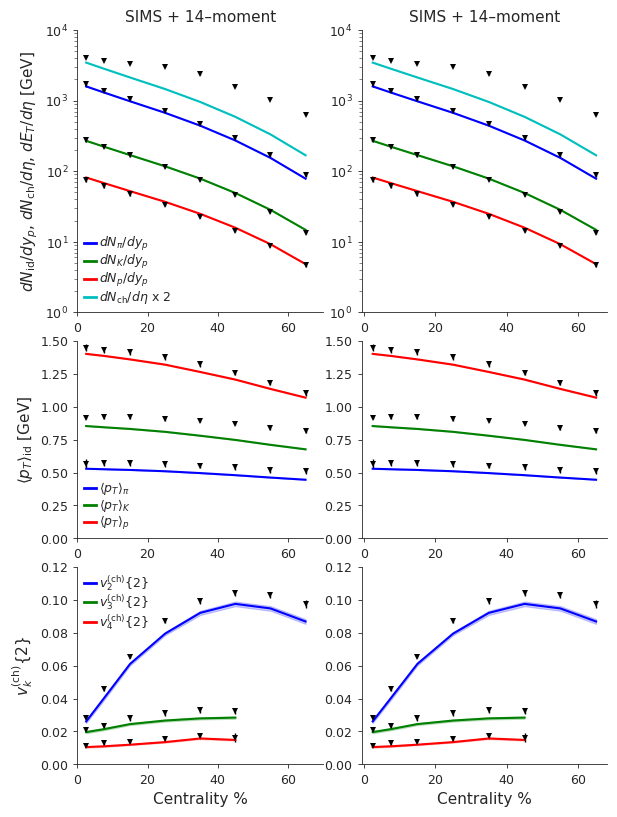

In [7]:
Ymodel1 = MAP_data1
Ymodel2 = MAP_data2

Yexp = Y_exp_data

# height_ratios = [1.8, 1.2, 1.5, 1.]
height_ratios = [2, 1.4, 1.4]
column = 2

fig, axes = plt.subplots(nrows=3, ncols=column, figsize=(6, 8), squeeze=False, 
                         gridspec_kw={'height_ratios': height_ratios})

for row, obs_group in enumerate(obs_groups.keys()):
    for obs, color in zip(obs_groups[obs_group], colors):
        expt_label = 'ALICE'
        
        axes[row][0].tick_params(labelsize=9)
        axes[row][1].tick_params(labelsize=9)
        
        scale = 1.0
        
        if obs_group == 'yields':
            axes[row][0].set_yscale('log')
            axes[row][1].set_yscale('log')
            
            axes[row][0].set_title("SIMS + 14–moment", fontsize = 11)
            axes[row][1].set_title("SIMS + 14–moment", fontsize = 11)
           
            if obs == 'dET_deta':
                scale = 5.
            if obs == 'dNch_deta':
                scale = 2.
        
        axes[row][0].set_ylabel(obs_group_labels[obs_group], fontsize = 11)
        
        xbins = np.array(obs_cent_list['Pb-Pb-5020'][obs])
        x = (xbins[:,0] + xbins[:,1]) / 2.

        Y1 = Ymodel1['Pb-Pb-5020'][obs]['mean'][0][0]
        Yerr1 = Ymodel1['Pb-Pb-5020'][obs]['err'][0][0]
        
        Y2 = Ymodel2['Pb-Pb-5020'][obs]['mean'][0][0]
        Yerr2 = Ymodel2['Pb-Pb-5020'][obs]['err'][0][0]
        
        label = obs_tex_labels[obs]
            
        axes[row][0].plot(x, Y1*scale, color = color, label = label, lw = 1.5)
        axes[row][0].fill_between(x, (Y1-Yerr1)*scale, (Y1+Yerr1)*scale, color=color, alpha=0.2)
        
        axes[row][1].plot(x, Y2*scale, color = color, label = label, lw = 1.5)
        axes[row][1].fill_between(x, (Y2-Yerr2)*scale, (Y2+Yerr2)*scale, color=color, alpha=0.2)
        
        exp_mean = Yexp['Pb-Pb-5020'][obs]['mean'][0]
        exp_err = Yexp['Pb-Pb-5020'][obs]['err'][0]
    
        axes[row][0].errorbar(x, exp_mean*scale, exp_err, color='black', fmt='v', markersize='4', elinewidth=1)
        axes[row][1].errorbar(x, exp_mean*scale, exp_err, color='black', fmt='v', markersize='4', elinewidth=1)
            

        
    leg = axes[row][0].legend(fontsize=9, borderpad=0, labelspacing=0, handlelength=1, handletextpad=0.2)
    
    for legobj in leg.legendHandles:
        legobj.set_linewidth(2.0)
        legobj.set_alpha(1.0)

    axes[row][0].set_xlim(0, 70)

    if obs_group == 'yields':
        axes[row][0].set_ylim(1, 1e4)
        axes[row][1].set_ylim(1, 1e4)
    if obs_group == 'mean_pT':
        axes[row][0].set_ylim(0., 1.5)
        axes[row][1].set_ylim(0., 1.5)
    if obs_group == 'flows':
        axes[row][0].set_ylim(0.0, 0.12)
        axes[row][1].set_ylim(0.0, 0.12)
    if axes[row][0].is_last_row():
        axes[row][0].set_xlabel('Centrality %', fontsize = 11)
        axes[row][1].set_xlabel('Centrality %', fontsize = 11)
        
plt.tight_layout(True)
# set_tight(fig, rect=[0, 0, 1, 0.95])
set_tight(fig, rect=[0, 0, 1, 1])
fig.savefig("SIMS_5020.png", dpi=300)

print("Done")

